In [1]:
using PyPlot
using JLD
using Dates
using Statistics: mean, var

mr  = include("../../Tools/Model_Reduction_Dev.jl")
at  = include("../../Tools/AnalysisToolbox.jl")
kmr = include("KSE_modredTools.jl")

Main.KSE_modredTools

In [14]:
server = startswith(pwd(), "/u5/jaredm") ? true : false
# When I want the standard lin et al. (2017) data.
sol_file = server ? "../../../data/KSE_Data/KSE_sol_linn.jld" :
   "Data/KSE_sol_lin.jld"

"Data/KSE_sol_lin.jld"

In [15]:
# Load Old Data
@time Data = load(sol_file)
print("Data Loaded")
uu      = Data["dat_uu"];  
vv      = Data["dat_vv"];
tt      = Data["dat_tt"];
obs_gap = Data["obs_gap"];
h       = Data["h"];

P       = Data["P"]
N       = Data["N"]

Δt = h*obs_gap

  0.422640 seconds (778 allocations: 1.077 GiB, 9.08% gc time)
Data Loaded

0.1

## View data

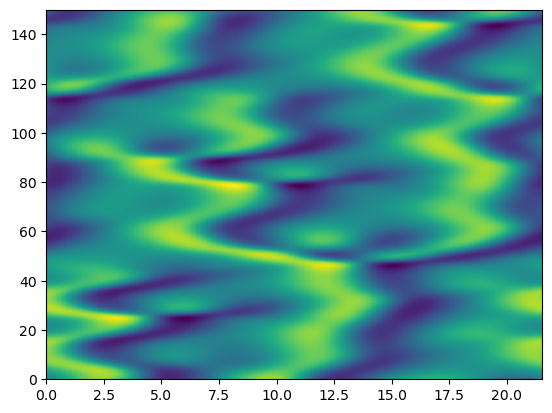

PyObject <matplotlib.image.AxesImage object at 0x0000000061238D90>

In [16]:
t_start = 0
t_stop = 150
ind_start = floor(Int,t_start/Δt)+1
ind_stop =floor(Int,t_stop/Δt)

H1 = imshow(uu[:,ind_start:ind_stop]', extent=[0,21.55,0,150], aspect="auto")

## Get tools (Psi, sig, pred)

In [17]:
Psi(x) = kmr.PSI(x; h, obs_gap, P, N)


Psi (generic function with 1 method)

In [18]:
sig = vv[2:6,2:end]

5×500000 Array{Complex{Float64},2}:
  -114.42+117.82im   -115.487+119.323im  …   34.3256-20.5656im
 -34.2526+176.602im  -41.5735+177.2im         3.2186-270.816im
  123.407+118.889im   117.578+122.885im     -48.3683+49.9066im
  12.9327+145.267im   14.1223+147.853im      69.8885-102.575im
  17.1884-61.6836im   16.1195-60.8588im     -61.5932+52.1895im

In [19]:
pred = mr.get_pred(vv[2:6,1:end-1], Psi)

25×500000 Array{Complex{Float64},2}:
   -113.407+116.39im        -114.42+117.82im     …     37.1851-24.4908im
   -27.0717+176.057im      -34.2526+176.602im         -1.45308-272.212im
    128.831+114.967im       123.407+118.889im         -51.7622+48.8547im
    11.5184+142.673im       12.9327+145.267im          72.4503-101.494im
    18.0814-62.4824im       17.1884-61.6836im         -61.0671+53.3644im
   -120.759+99.6663im      -121.703+100.399im    …     28.9525-16.6166im
   -59.0172+159.16im       -66.7944+158.963im          11.0306-286.889im
    85.9007+116.247im        79.607+118.789im         -74.2671+61.1014im
    2.18892+195.796im      0.859319+197.271im          75.0194-49.4644im
    8.92425+4.10522im       4.33845+7.21936im         -39.6874+28.9346im
 -3.11583e6+2.10043e6im  -3.22216e6+1.90237e6im  …   7.72658e5+5.47466e6im
  4.77361e6-6.75195e6im    5.3383e6-6.64326e6im     -3.09697e6-7.91733e6im
 -1.45354e6-9.86857e6im  -3.83815e5-1.00061e7im      8.61722e5+4.77537e6im
  7.7209

In [20]:
pred_m = mean(pred,dims=2)

25×1 Array{Complex{Float64},2}:
    2.630192895546483 + 1.6266338688573632im
   -3.233755835639557 - 6.928153565491069im
   1.9349657652956767 - 1.6655777103190443im
   1.5096865817411065 + 1.214038919259711im
 -0.40607737274632916 - 0.4526229706611083im
   2.4813441902580267 + 1.2417389165906032im
   -3.251517345748456 - 6.4151480393249685im
   2.0284081068029076 - 1.6449653907709965im
   2.2873812727935596 + 1.5193142383616334im
   0.2063257747046232 - 1.271488984706801im
   102619.02827268494 - 53296.42794583783im
   -43140.38978722004 + 102251.12238284129im
    73175.68270863571 - 326278.4772824796im
    130258.4039957758 - 740790.0437346089im
  -61255.238313356975 - 30284.827933544104im
   -59568.40064531709 - 65809.48888424752im
    468019.2044976993 - 85674.81918700419im
  -156492.47063247295 + 29189.867684798708im
    38260.84023432814 - 172347.06610650464im
    -4956.49761670808 - 59274.707307404504im
  -185351.33629853738 + 1725.2063650284567im
   174563.13893103943 + 11382.8

## Autocovariances

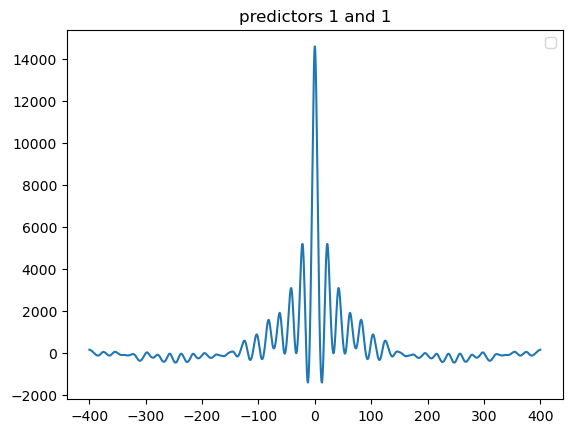

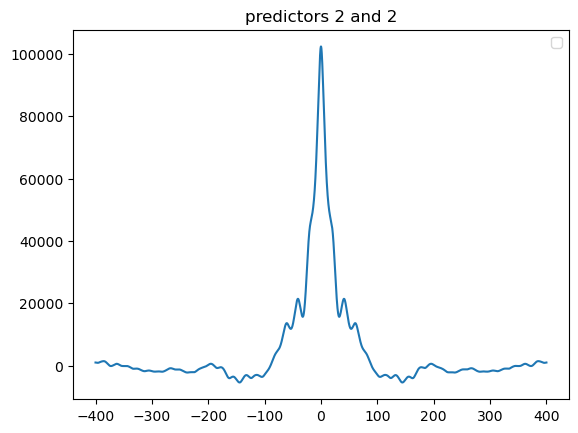

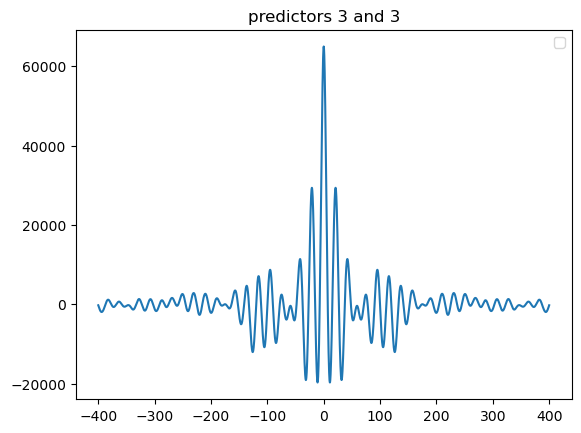

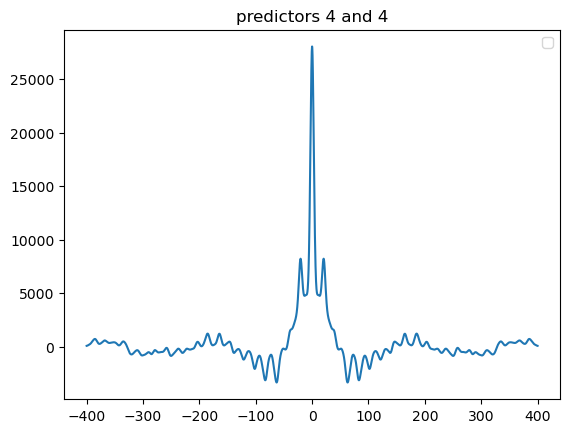

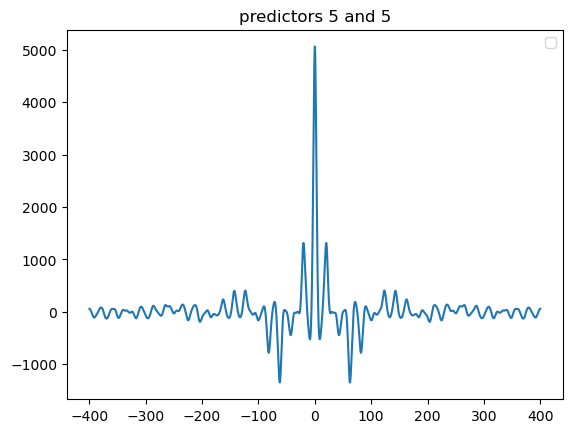

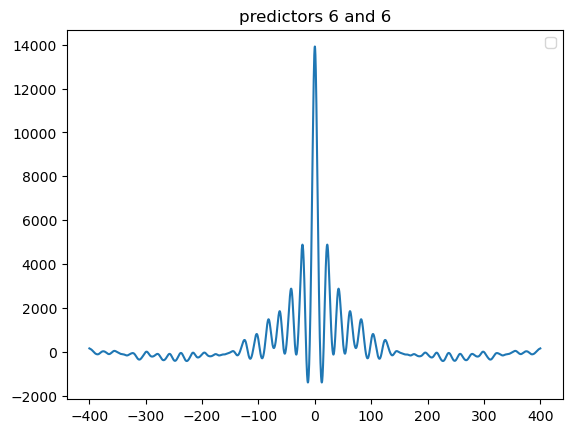

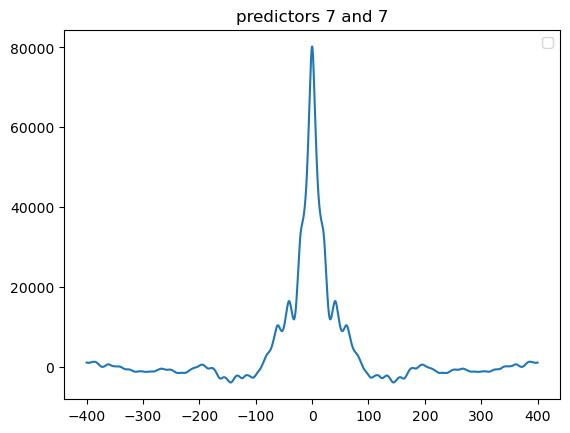

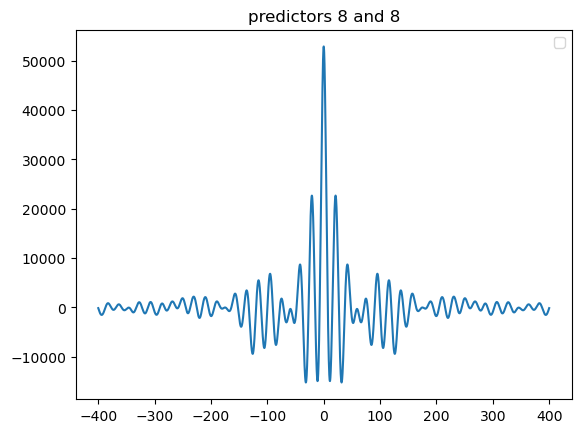

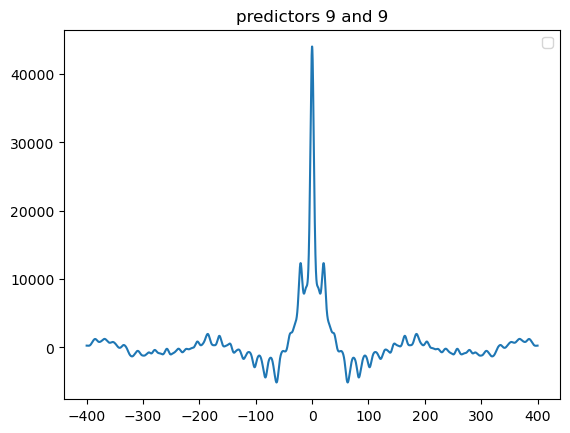

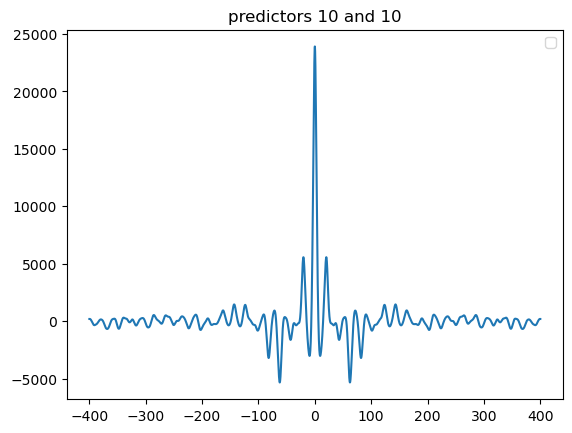

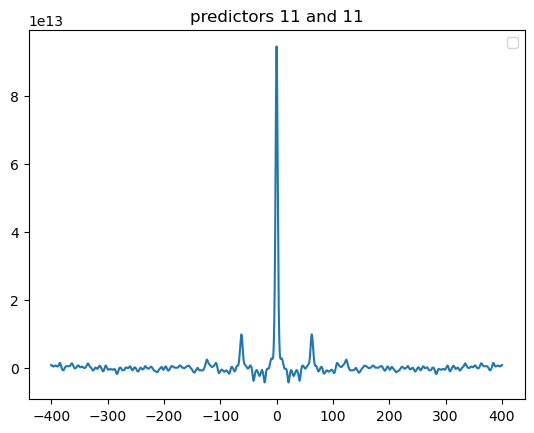

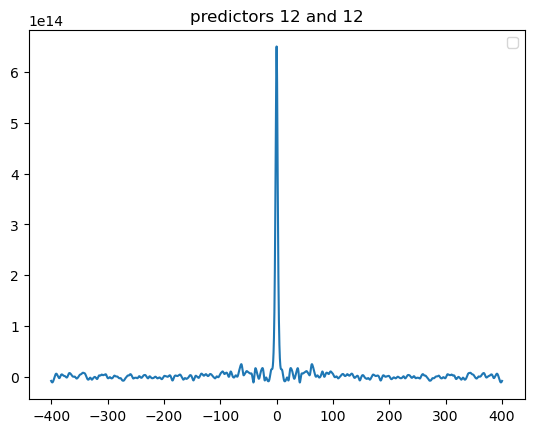

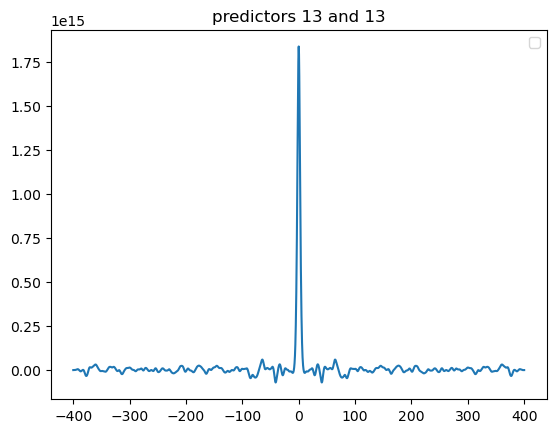

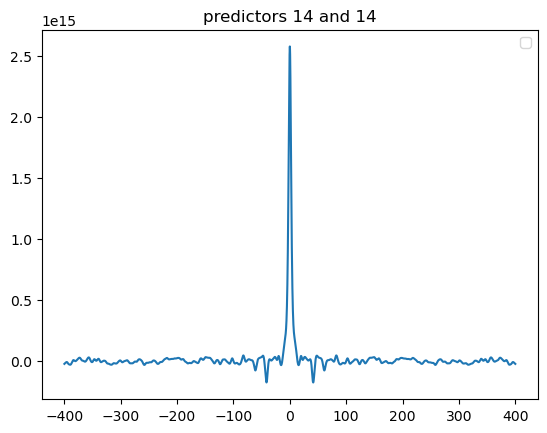

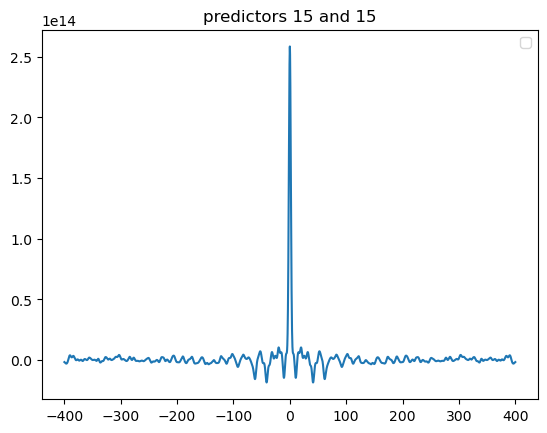

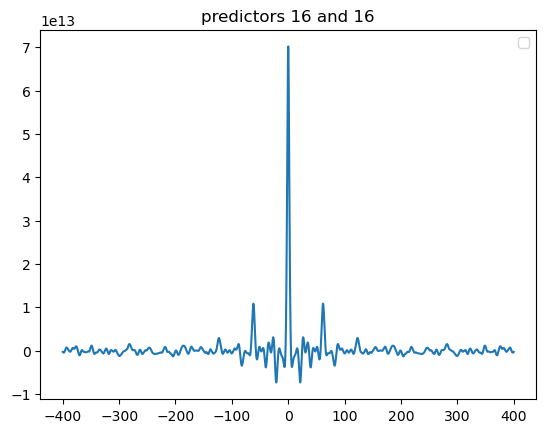

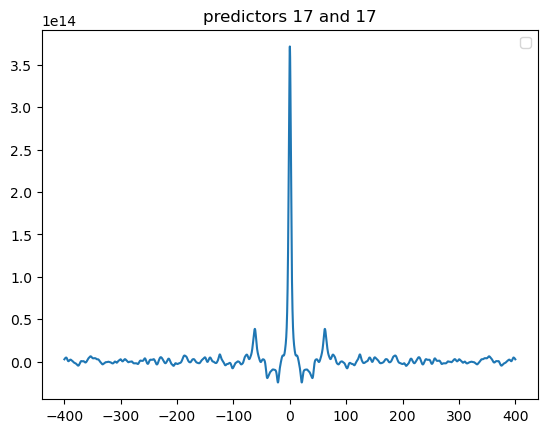

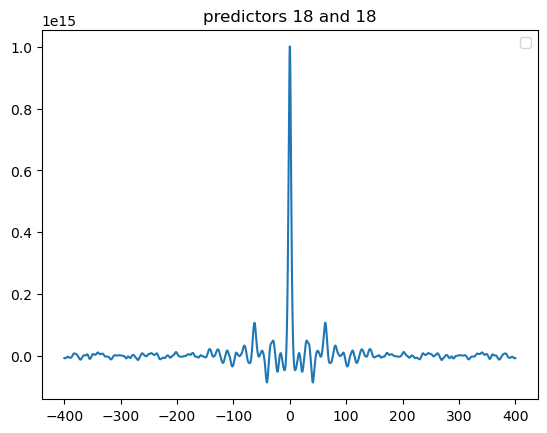

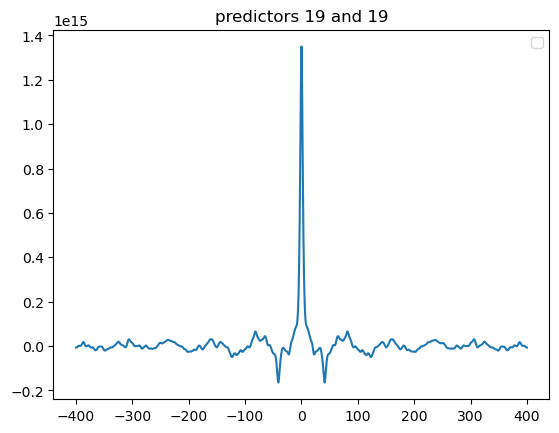

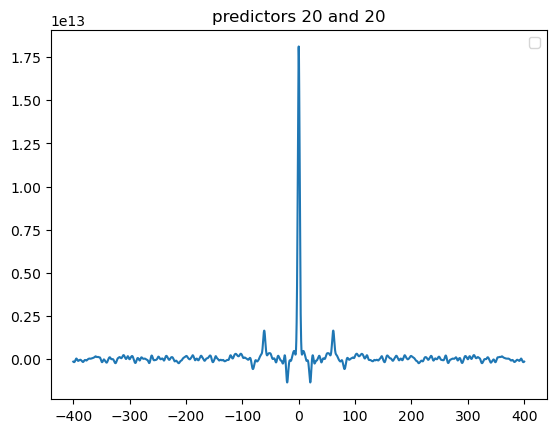

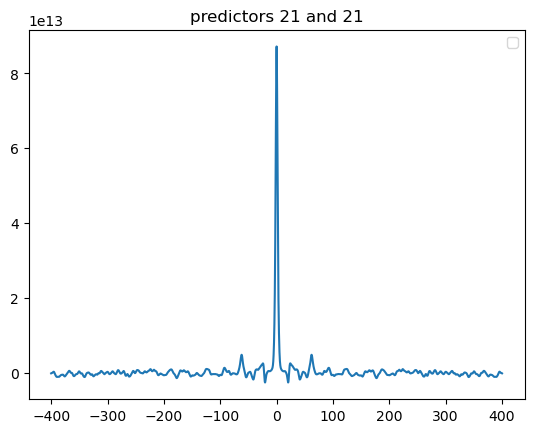

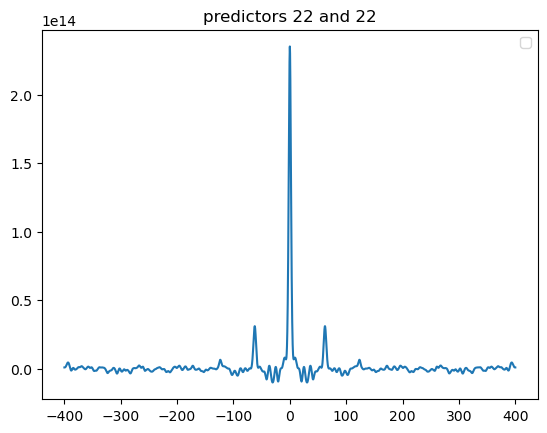

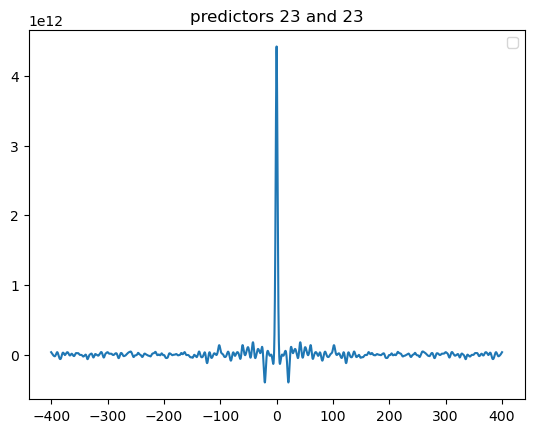

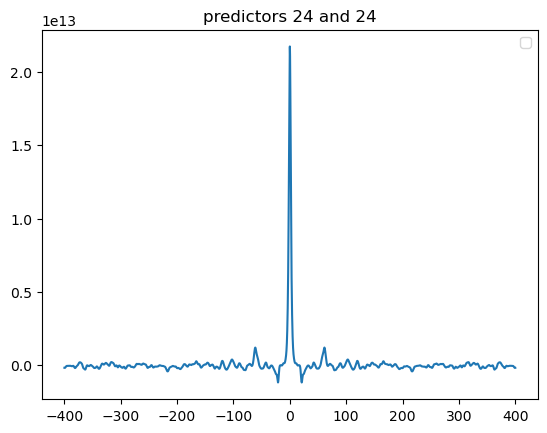

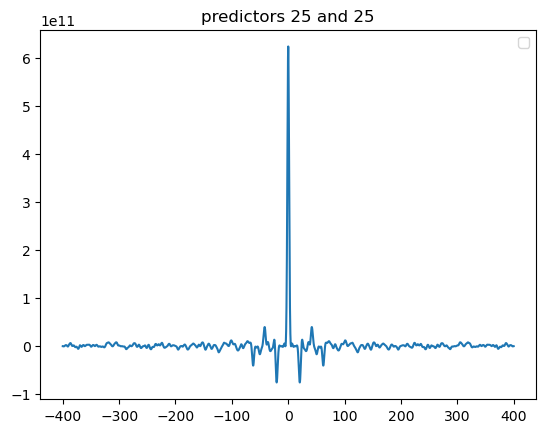

C:\Users\jared\.julia\conda\3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
No handles with labels found to put in legend.
C:\Users\jared\.julia\conda\3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
No handles with labels found to put in legend.
C:\Users\jared\.julia\conda\3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
No handles with labels found to put in legend.
C:\Users\jared\.julia\conda\3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
No handles with labels found to put in legend.
C:\Users\jar

In [21]:
lags = -4000:4000
let plt = plot
    for m = 1:25
        figure()
        A = at.my_crosscov(pred[m,:],pred[m,:],lags)
        plt(Δt*lags,A)
        legend()
        title("predictors $m and $m")
    end
end

## Cross Covariances

In [ ]:
n = 5
lags = -10000:10000
let plt = plot
    for m = 1:25
        figure()
        A = at.my_crosscov(sig[n,:],pred[m,:],lags)
        plt(Δt*lags,A)
        legend()
        title("modes $n and $m")
    end
end

## Power Spectra and Cross Power Spectra 

In [40]:
L = 1000
Nex = 2^12

4096

In [ ]:
z_crossspect_sigpred_num_fft = at.z_crossspect_fft_old(sig, pred; L, Nex);

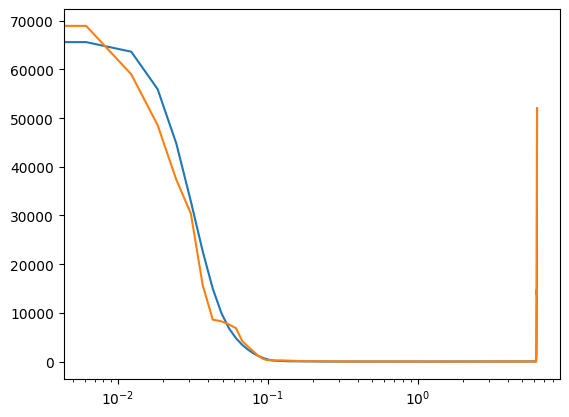

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f7f8685f100>

In [30]:
L = 200
Nex = 2^10
n = 2
p = 5
nfft = Nex

Theta = 2π/Nex*(0:Nex-1)
points =  Nex

n = 2
m = 2
S_sigpred_dm = at.z_crossspect_dm(sig[n,:],pred[m,:]; L, Nex)
S_sigpred_sp = at.z_crossspect_scalar_ASP(sig[n,:],pred[m,:]; n,p, nfft )

semilogx(Theta[1:end÷points:end],S_sigpred_dm[1:end÷points:end])
semilogx(Theta[1:end÷points:end],S_sigpred_sp[1:end÷points:end])

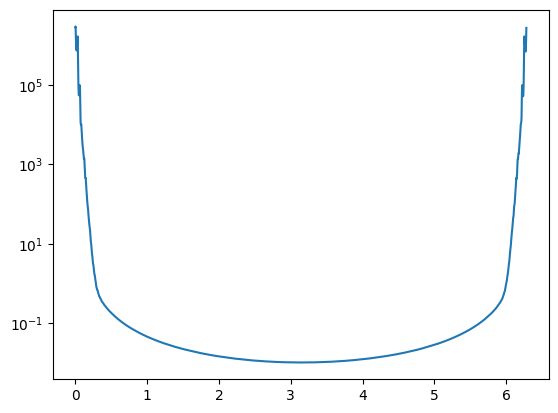

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7ff725741a30>

In [69]:
n = 1
m = 6
semilogx(Theta[1:end ÷ points:end],z_crossspect_sigpred_num_fft[n,m,1:end÷points:end])

In [ ]:
S_sigpred = z_crossspect_dm(sig[n,:],pred; L, Nex)
semilogy(Theta[1:end ÷ points:end],z_crossspect_sigpred_num_fft[n,m,1:end÷points:end])